In [1]:
import numpy as np
import pandas as pd

from scipy.stats import iqr
from scipy.stats import uniform

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Types of data
![types of data](screens/types_of_data.png)

# Skewed data
`mean` is always pulled in the direction of the skew
![skew](screens/skewed.png)

In [2]:
food_consumption = pd.read_csv('datasets/food_consumption.csv', index_col=0)
food_consumption

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96
...,...,...,...,...
1426,Bangladesh,dairy,21.91,31.21
1427,Bangladesh,wheat,17.47,3.33
1428,Bangladesh,rice,171.73,219.76
1429,Bangladesh,soybeans,0.61,0.27


In [3]:
food_consumption[food_consumption['country'] == 'USA'].agg([np.mean, np.median])

,consumption,co2_emission
mean,44.65,156.26
median,14.58,15.34


In [4]:
food_consumption[(food_consumption['country'] == 'USA') | (food_consumption['country'] == 'Belgium')] \
    .groupby('country') \
    .agg([np.mean, np.median])

consumption        co2_emission       
               mean median         mean median
country                                       
Belgium   42.132727  12.59       100.19  21.34
USA       44.650000  14.58       156.26  15.34

In [5]:
food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')] \
    .pivot_table(index=['country'],
                 aggfunc=[np.mean, np.median],
                 values=['consumption', 'co2_emission'])

mean                   median            
        co2_emission consumption co2_emission consumption
country                                                  
Belgium       100.19   42.132727        21.34       12.59
USA           156.26   44.650000        15.34       14.58

In [6]:
food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')] \
    .pivot_table(index=['country'],
                 aggfunc=[np.mean, np.median],
                 values=['consumption', 'co2_emission'],
                 columns=['food_category'])

mean                                                 \
              co2_emission                                                  
food_category         beef   dairy   eggs   fish lamb_goat   nuts    pork   
country                                                                     
Belgium             482.31  336.43  11.57  30.29     46.23  12.96  136.80   
USA                1118.29  362.78  13.39  19.72     15.06  13.91   97.83   

                                       ...      median                \
                                       ... consumption                 
food_category poultry   rice soybeans  ...       dairy   eggs   fish   
country                                ...                             
Belgium         13.11  11.02     0.03  ...      236.19  12.59  18.97   
USA             53.72   8.80     0.02  ...      254.69  14.58  12.35   

                                                                     
                                                                     
food_category lamb_goat  nuts   pork poultry  rice soybeans   wheat  
country                                                              
Belgium            1.32  7.32  38.65   12.20  8.61     0.07  111.91  
USA                0.43  7.86  27.64   50.01  6.88     0.04   80.43  

[2 rows x 44 columns]

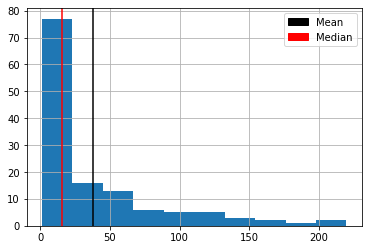

In [7]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
rice_consumption['co2_emission'].hist() # .plot(kind='hist') works as well

plt.axvline(rice_consumption['co2_emission'].mean(), color='k')
black_patch = mpatches.Patch(color='k', label='Mean')

plt.axvline(rice_consumption['co2_emission'].median(), color='r')
red_patch = mpatches.Patch(color='r', label='Median')

plt.legend(handles=[black_patch, red_patch])
plt.show()

# Measures of spread

## Variance

In [8]:
# ddof - “Delta Degrees of Freedom", by default = 0. That's for whole pupulation, so DO NOT forget to set ddof=1
np.var(food_consumption[['consumption', 'co2_emission']], ddof=1)

consumption      2481.837554
co2_emission    23133.973639
dtype: float64

In [9]:
def my_variance(data: np.array, ddof=1, axis=0) -> np.array:
    squareDiff = (data - data.mean()) ** 2
    sumOfDiffs = np.sum(squareDiff)
    return sumOfDiffs / (data.shape[axis] - ddof)


my_variance(food_consumption[['consumption', 'co2_emission']]) \
    == np.var(food_consumption[['consumption', 'co2_emission']], ddof=1)

consumption     True
co2_emission    True
dtype: bool

## Standard deviation (SD, STD)

In [10]:
def my_std(data: np.array, ddof=1, axis=0) -> np.array:
    return np.sqrt(my_variance(data, ddof, axis))


my_std(food_consumption[['consumption', 'co2_emission']]) \
    == np.std(food_consumption[['consumption', 'co2_emission']], ddof=1)

consumption     True
co2_emission    True
dtype: bool

## Mean Absolute Deviation (MAD)

In [11]:
def my_mad(data: np.array, ddof=1, axis=0) -> np.array:
    absoluteDiff = np.abs(data - data.mean())
    sumOfAbsoluteDiff = np.sum(absoluteDiff)
    return sumOfAbsoluteDiff / (data.shape[axis] - ddof)


my_mad(food_consumption[['consumption', 'co2_emission']])

consumption     30.889104
co2_emission    89.744317
dtype: float64

## Interquartile Range (IQR)

![IQR](screens/IQR.png)

In [12]:
def my_iqr(data: np.array) -> np.array:
    return np.quantile(data, 0.75) - np.quantile(data, 0.25)


my_iqr(food_consumption[['consumption']]) \
    == iqr(food_consumption[['consumption']])

True

In [13]:
np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 5))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

### Outlier

In [14]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64

# Random Numbers and Probability

In [15]:
amir_deals = pd.read_csv('datasets/amir_deals.csv', index_col=0)
amir_deals

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
174,Product A,Current,Lost,5835.32,23
175,Product D,Current,Won,6377.50,12
176,Product D,Current,Won,3537.61,28
177,Product A,Current,Won,6448.07,34


In [16]:
product_counts = amir_deals['product'].value_counts()
product_counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

## Sample without replacement

In [17]:
np.random.seed(24)
sample_without_replacement = amir_deals.sample(5, replace=False)
sample_without_replacement

,product,client,status,amount,num_users
128,Product B,Current,Won,2070.25,7
149,Product D,Current,Won,3485.48,52
78,Product B,Current,Won,6252.30,27
105,Product D,Current,Won,4110.98,39
167,Product C,New,Lost,3779.86,11


## Sample with replacement

In [18]:
np.random.seed(24)
sample_with_replacement = amir_deals.sample(5, replace=True)
sample_with_replacement

,product,client,status,amount,num_users
163,Product D,Current,Won,6755.66,59
132,Product B,Current,Won,6872.29,25
88,Product C,Current,Won,3579.63,3
146,Product A,Current,Won,4682.94,63
146,Product A,Current,Won,4682.94,63


# Distributions

### Uniform distribution
Bus drives to the stop every 12th minute. What it the probability of waiting for the bus between 4 and 7 minutes?
![uniform_distribution](screens/uniform_distribution.png)

In [19]:
# Cumulative distribution function
wait_for_leq_7_minutes = uniform.cdf(7, 
                                 0, # lower limit
                                 12 # upper limit
                                ) 
wait_for_leq_4_minutes = uniform.cdf(4, 0, 12)

# The probability of waiting between 4 and 7 minutes
wait_for_leq_7_minutes - wait_for_leq_4_minutes

0.25000000000000006

In [20]:
# The probalility of waiting more then 7 minutes
wait_for_gt_7_minutes = 1 - wait_for_leq_7_minutes

# Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).
wait_for_gt_7_minutes_sf = uniform.sf(7, 0, 12)
print('(1 - cdf):', wait_for_gt_7_minutes)
print('sf:', wait_for_gt_7_minutes_sf)

(1 - cdf): 0.41666666666666663
sf: 0.41666666666666663


#### Generate uniform distribution

In [21]:
# Random variates
random_uniform = uniform.rvs(0, # upper bound
                             5, # lower bound 
                             size=1000)

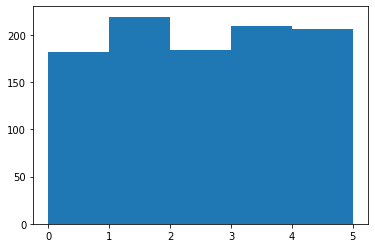

In [22]:
plt.hist(random_uniform, bins=range(0, 6))
plt.show()